## 1. Introduction

This project aims to refine the existing **VO₂ Max** model, a critical indicator of cardiovascular fitness, using data collected from running activities.

### Objectives
- Explore relationships between physiological, performance, and environmental metrics and VO₂ Max
- Engineer meaningful features to improve model accuracy and explainability
- Compare multiple machine learning models to determine the most robust and interpretable solution


## 2. Load Dataset

We load a dataset from a public repository containing activity-level metrics such as heart rate, cadence, elevation, and power from wearable devices.


In [111]:
import pandas as pd

url = "https://raw.githubusercontent.com/Redback-Operations/redback-fit-sports-performance/refs/heads/main/VO2max/simu_vo2_activities.csv"
df = pd.read_csv(url)

# Show the first few rows
df


,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Filename,...,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr,Average Speed km/h,VO2 Max
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,activities/3117764808.csv.gz,...,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0,21.560399,22.243452
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,activities/3136634767.csv.gz,...,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0,22.834800,21.508333
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,activities/3139195577.csv.gz,...,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0,20.880001,20.773214
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,activities/3144285271.csv.gz,...,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0,20.509200,24.595833
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,activities/3148981215.csv.gz,...,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0,20.365200,20.731250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,10123465749,"27 Jun 2023, 04:34:42","Southbank / Melbourne, Royal Botanic Gardens V...",Run,4615,13.26,173.0,219.0,False,activities/10843973828.csv.gz,...,311.5,264.9,252.5,243.5,241.4,238.0,0.0,0.0,10.503331,36.761657
341,10123472446,"29 Jun 2023, 05:05:11",Southbank / Richmond,Run,3384,10.14,174.0,130.0,False,activities/10843980813.csv.gz,...,279.0,249.6,246.6,245.3,244.2,0.0,0.0,0.0,10.840401,37.941405
342,10123474604,"30 Jun 2023, 06:04:06",Southbank / Melbourne,Run,3433,9.10,175.0,44.0,False,activities/10843983156.csv.gz,...,301.8,261.6,250.7,241.0,242.2,0.0,0.0,0.0,10.565716,36.980005
343,10271577919,"18 Nov 2023, 00:01:54","Southbank / Mount Martha, The Briars",Ride,22391,150.03,142.0,68.0,False,activities/10998331057.csv.gz,...,272.7,212.1,197.2,178.5,164.5,151.0,146.1,145.4,25.467761,25.053750


## 3. Data Exploration and Cleaning

### Key Steps:
- Checked column types and missing values
- Removed irrelevant columns such as filenames and raw timestamps
- Filtered for **running activities** to ensure consistency in VO₂ Max estimation


In [112]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity ID             345 non-null    int64  
 1   Activity Date           345 non-null    object 
 2   Activity Name           345 non-null    object 
 3   Activity Type           345 non-null    object 
 4   Elapsed Time            345 non-null    int64  
 5   Distance                345 non-null    float64
 6   Max Heart Rate          345 non-null    float64
 7   Relative Effort         345 non-null    float64
 8   Commute                 345 non-null    bool   
 9   Filename                345 non-null    object 
 10  Athlete Weight          345 non-null    float64
 11  Moving Time             345 non-null    float64
 12  Max Speed               345 non-null    float64
 13  Average Speed           345 non-null    float64
 14  Elevation Gain          345 non-null    fl

Activity ID               0
Activity Date             0
Calories                  0
Average Temperature       0
Total Work                0
Weighted Average Power    0
Power Count               0
Average Elapsed Speed     0
Dirt Distance             0
Maximum Power 5s          0
Maximum Power 10s         0
Maximum Power 30s         0
Maximum Power 1.0min      0
Maximum Power 5.0min      0
Maximum Power 10.0min     0
Maximum Power 20.0min     0
Maximum Power 30.0min     0
Maximum Power 1.0 hr      0
Maximum Power 1.5 hr      0
Maximum Power 2.0 hr      0
Average Speed km/h        0
Average Watts             0
Average Heart Rate        0
Average Cadence           0
Athlete Weight            0
Activity Name             0
Activity Type             0
Elapsed Time              0
Distance                  0
Max Heart Rate            0
Relative Effort           0
Commute                   0
Filename                  0
Moving Time               0
Max Cadence               0
Max Speed           

In [113]:
df.describe()

,Activity ID,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Athlete Weight,Moving Time,Max Speed,Average Speed,Elevation Gain,...,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr,Average Speed km/h,VO2 Max
count,3.450000e+02,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,6.902344e+09,5979.898551,34.531594,160.881159,90.675362,80.046377,5756.182609,9.384317,5.409151,73.369450,...,256.211594,226.977391,219.397101,213.540870,208.779130,149.720000,94.603768,44.874783,19.472945,32.824596
std,2.216048e+09,3386.451360,29.416878,20.664550,96.468992,0.428823,3212.340525,5.358274,2.395178,88.583913,...,38.860312,43.435546,45.371032,45.956143,48.554844,92.424956,94.613402,79.101485,8.622642,5.407514
min,2.929442e+09,1506.000000,4.060000,118.000000,5.000000,80.000000,1506.000000,3.233984,2.696547,0.000000,...,156.600000,127.600000,119.000000,115.300000,0.000000,0.000000,0.000000,0.000000,9.707569,20.576875
25%,3.758711e+09,3646.000000,12.150000,142.000000,25.000000,80.000000,3589.000000,4.600000,2.986536,11.152266,...,230.100000,191.500000,181.900000,174.600000,170.300000,112.300000,0.000000,0.000000,10.751529,28.450000
50%,7.882339e+09,5583.000000,24.280000,160.000000,51.000000,80.000000,5472.000000,10.100000,6.111000,47.372538,...,262.400000,237.500000,233.600000,229.200000,216.600000,168.400000,121.200000,0.000000,21.999600,34.096749
75%,8.334993e+09,7338.000000,52.230000,178.000000,127.000000,80.000000,7153.000000,12.438001,7.582000,94.000000,...,282.400000,262.300000,256.700000,251.200000,248.500000,235.300000,172.900000,123.300000,27.295199,37.555204
max,1.027158e+10,22391.000000,180.080000,210.000000,528.000000,84.000000,21208.000000,45.083332,10.652900,567.370667,...,342.800000,323.300000,319.300000,315.700000,301.500000,289.800000,287.600000,272.100000,38.350439,45.311225


In [114]:
df['Activity Type'].value_counts()


Activity Type
Ride    181
Run     164
Name: count, dtype: int64

## 4. Feature Engineering

We engineered features to improve prediction and interpretability:

- **Pace (sec/km)** = Elapsed time per km
- **Power-to-Weight Ratio** = Avg watts / weight
- **Speed Variability** = Max Speed / Avg Speed
- **Elevation Gain per km** = Terrain intensity
- **Terrain Type** = Categorized elevation gain into Flat, Moderate, Hilly

> These features represent performance effort, terrain difficulty, and physiological demand.


In [115]:
df = df[df['Activity Type'] == 'Run'].copy()

df['Pace (sec/km)'] = df['Elapsed Time'] / df['Distance']
df['Power-to-Weight Ratio'] = df['Average Watts'] / df['Athlete Weight']
df['Speed Variability'] = df['Max Speed'] / df['Average Speed']
df['Elevation Gain per km'] = df['Elevation Gain'] / df['Distance']

df['Terrain Type'] = pd.cut(df['Elevation Gain per km'], 
                            bins=[-1, 5, 15, float('inf')], 
                            labels=['Flat', 'Moderate', 'Hilly'])


In [116]:
df['Terrain Type'].value_counts()


Terrain Type
Flat        101
Moderate     58
Hilly         5
Name: count, dtype: int64

In [117]:
df = pd.get_dummies(df, columns=['Terrain Type'], drop_first=True)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity ID             164 non-null    int64  
 1   Activity Date           164 non-null    object 
 2   Activity Name           164 non-null    object 
 3   Activity Type           164 non-null    object 
 4   Elapsed Time            164 non-null    int64  
 5   Distance                164 non-null    float64
 6   Max Heart Rate          164 non-null    float64
 7   Relative Effort         164 non-null    float64
 8   Commute                 164 non-null    bool   
 9   Filename                164 non-null    object 
 10  Athlete Weight          164 non-null    float64
 11  Moving Time             164 non-null    float64
 12  Max Speed               164 non-null    float64
 13  Average Speed           164 non-null    float64
 14  Elevation Gain          164 non-null    float6

## 5. Feature Selection and Multicollinearity Handling

VO₂ Max values in the dataset were simulated in a **previous version** of the model based on established protocols described in Sport Coaching NZ. These protocols reflect how devices like Garmin compute VO₂ Max using activity metrics—most notably, running speed.

Link to the article: https://sportcoaching.co.nz/how-does-garmin-calculate-vo2-max/

### A. Correlation Analysis
We first explored the correlation matrix to identify variables highly correlated with VO₂ Max. Notably:

- **`Average Speed`** had a perfect correlation with VO₂ Max due to the formula used to simulate it (e.g., VO₂ Max = 3.5 × speed for running).
- While powerful for prediction, it introduces data leakage and masks the true physiological or environmental drivers.

Therefore, we **excluded `Average Speed` and other speed-derived features** to maintain model integrity and prevent overfitting.

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [120]:
correlation = df.corr(numeric_only=True)['VO2 Max'].sort_values(ascending=False)
correlation

VO2 Max                   1.000000
Average Speed km/h        1.000000
Average Speed             1.000000
Average Watts             0.916635
Power-to-Weight Ratio     0.916635
Weighted Average Power    0.883502
Maximum Power 20.0min     0.814789
Maximum Power 10.0min     0.782272
Maximum Power 5.0min      0.761083
Average Elapsed Speed     0.692458
Maximum Power 30.0min     0.652722
Maximum Power 1.0min      0.603028
Average Cadence           0.488216
Maximum Power 30s         0.472463
Maximum Power 1.0 hr      0.406867
Max Heart Rate            0.402824
Relative Effort           0.296619
Average Heart Rate        0.273853
Calories                  0.247644
Distance                  0.243071
Moving Time               0.137963
Power Count               0.114242
Maximum Power 10s         0.086005
Max Grade                 0.078725
Elapsed Time              0.073606
Maximum Power 5s          0.072675
Maximum Power 1.5 hr      0.060506
Total Work                0.036441
Elevation Loss      

In [121]:
selected_features = [
    'Distance', 'Max Heart Rate', 'Relative Effort',
    'Moving Time', 'Max Speed', 'Average Speed', 'Elevation Gain',
    'Elevation Loss', 'Max Grade', 'Average Grade', 'Max Cadence', 'Average Cadence',
    'Average Heart Rate', 'Average Watts', 'Calories', 'Average Temperature',
    'Total Work', 'Weighted Average Power', 'Average Elapsed Speed',
    'Dirt Distance', 'Pace (sec/km)', 'Power-to-Weight Ratio',
    'Speed Variability', 'Elevation Gain per km', 'Terrain Type_Moderate',
    'Terrain Type_Hilly'
]

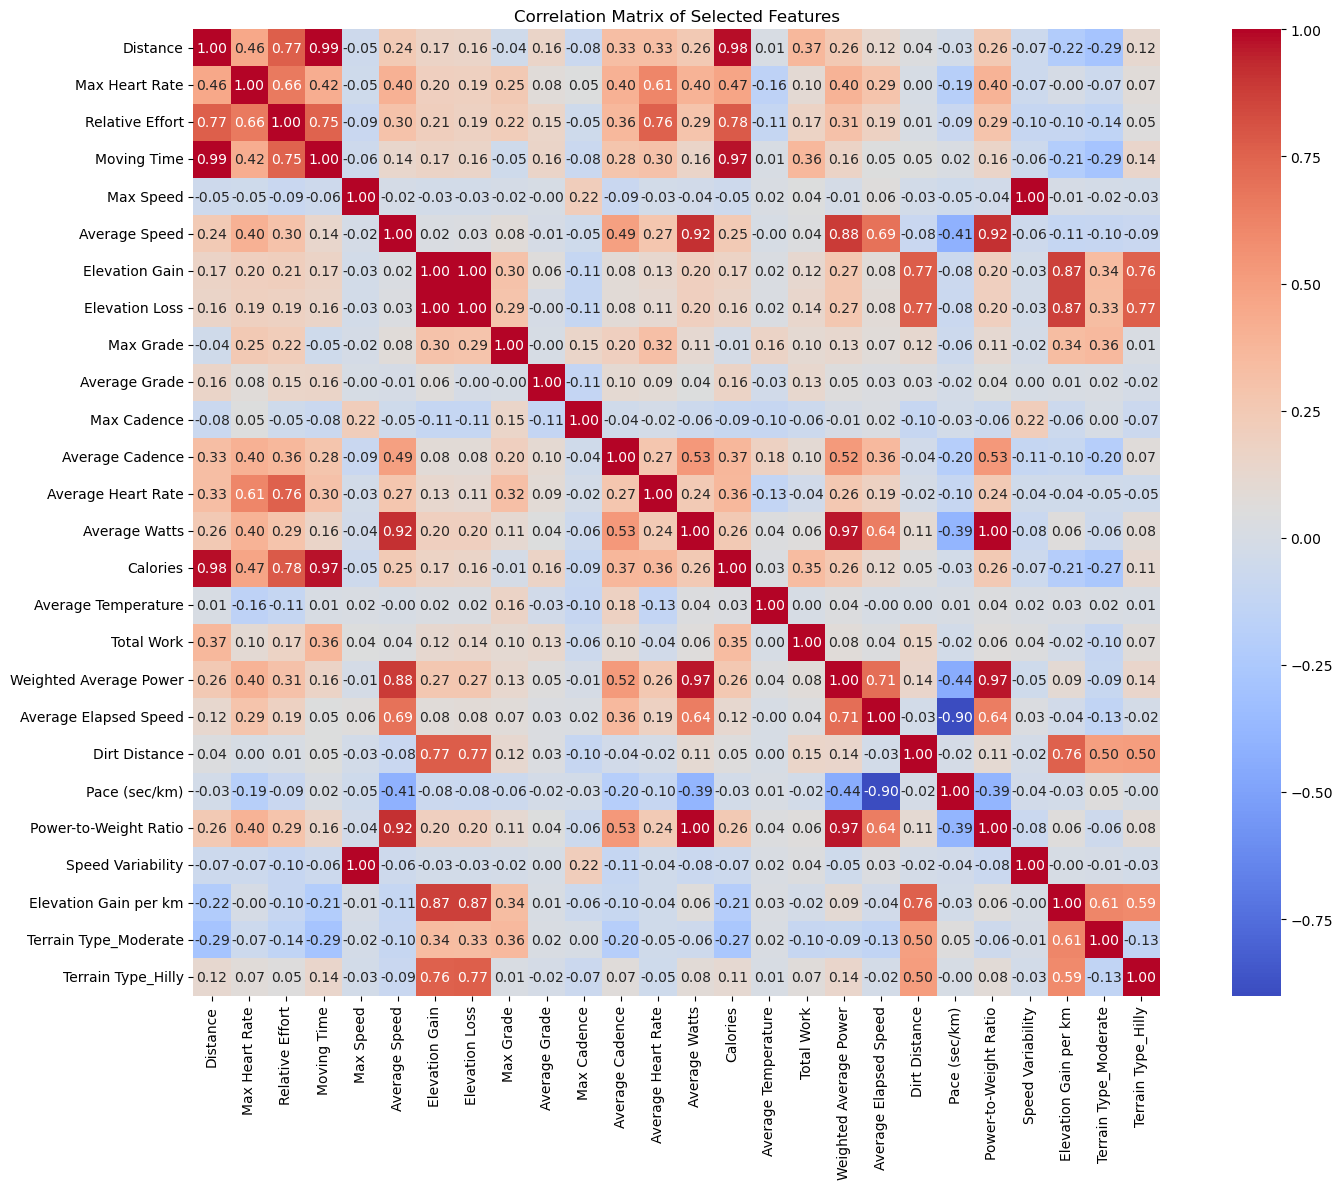

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()


### B. Variance Inflation Factor (VIF)

To reduce multicollinearity and enhance model interpretability, we calculated VIF scores for all selected features.

Key actions taken:
- Removed features with **VIF > 10**, such as:
  - `Distance`, `Average Watts`, and `Weighted Average Power`
- Dropped mathematically derived or redundant features. For example:
  - **Power** and **Weight** were used to create `Power-to-Weight Ratio`; keeping all three would introduce collinearity
  - **Pace**, **Speed**, and **Elapsed Time** often encoded similar information

These features were either:
- **Mathematically related** to other variables already included, or
- **Highly correlated** with each other or with the target (VO₂ Max)

By removing them, we reduced multicollinearity, minimized risk of overfitting, and improved the **explainability** of the model — without sacrificing predictive performance.


In [123]:
from sklearn.preprocessing import StandardScaler 
X_scaled = StandardScaler().fit_transform(df[selected_features])
print(X_scaled.shape)  # should now be (164, 26)


(164, 26)


In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_df = pd.DataFrame(X_scaled, columns=selected_features)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


                   Feature          VIF
13           Average Watts          inf
21   Power-to-Weight Ratio          inf
0                 Distance  1358.795174
22       Speed Variability  1081.441147
4                Max Speed  1078.406919
3              Moving Time  1063.695955
6           Elevation Gain   243.502840
7           Elevation Loss   233.174338
14                Calories    49.470107
17  Weighted Average Power    44.331286
5            Average Speed    36.841628
18   Average Elapsed Speed    33.239411
23   Elevation Gain per km    19.867883
20           Pace (sec/km)    16.838992
2          Relative Effort     9.708582
25      Terrain Type_Hilly     6.433069
24   Terrain Type_Moderate     5.467331
12      Average Heart Rate     4.256839
19           Dirt Distance     4.074987
1           Max Heart Rate     2.322975
11         Average Cadence     2.042681
8                Max Grade     1.998850
9            Average Grade     1.975109
16              Total Work     1.609876


/Users/michellelai/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Final Feature Strategy
We retained features across three important domains:

- **Physiological**: Max Heart Rate, Average Heart Rate, Power-to-Weight Ratio, Moving Time
- **Performance**: Moving Time, Cadence, Grade, Total Work
- **Environmental**: Terrain Type, Dirt Distance, Temperature, Elevation Gain per km

This curated selection provides a holistic and explainable foundation for VO₂ Max prediction.

In [128]:
selected_features = [
  "Power-to-Weight Ratio",
    "Pace (sec/km)",
    "Average Heart Rate",
    "Max Heart Rate",
    "Average Cadence",
    "Average Grade",
    "Elevation Gain per km",
    "Total Work",
    "Dirt Distance",
    "Terrain Type_Moderate",
    "Terrain Type_Hilly",
    "Average Temperature"
]

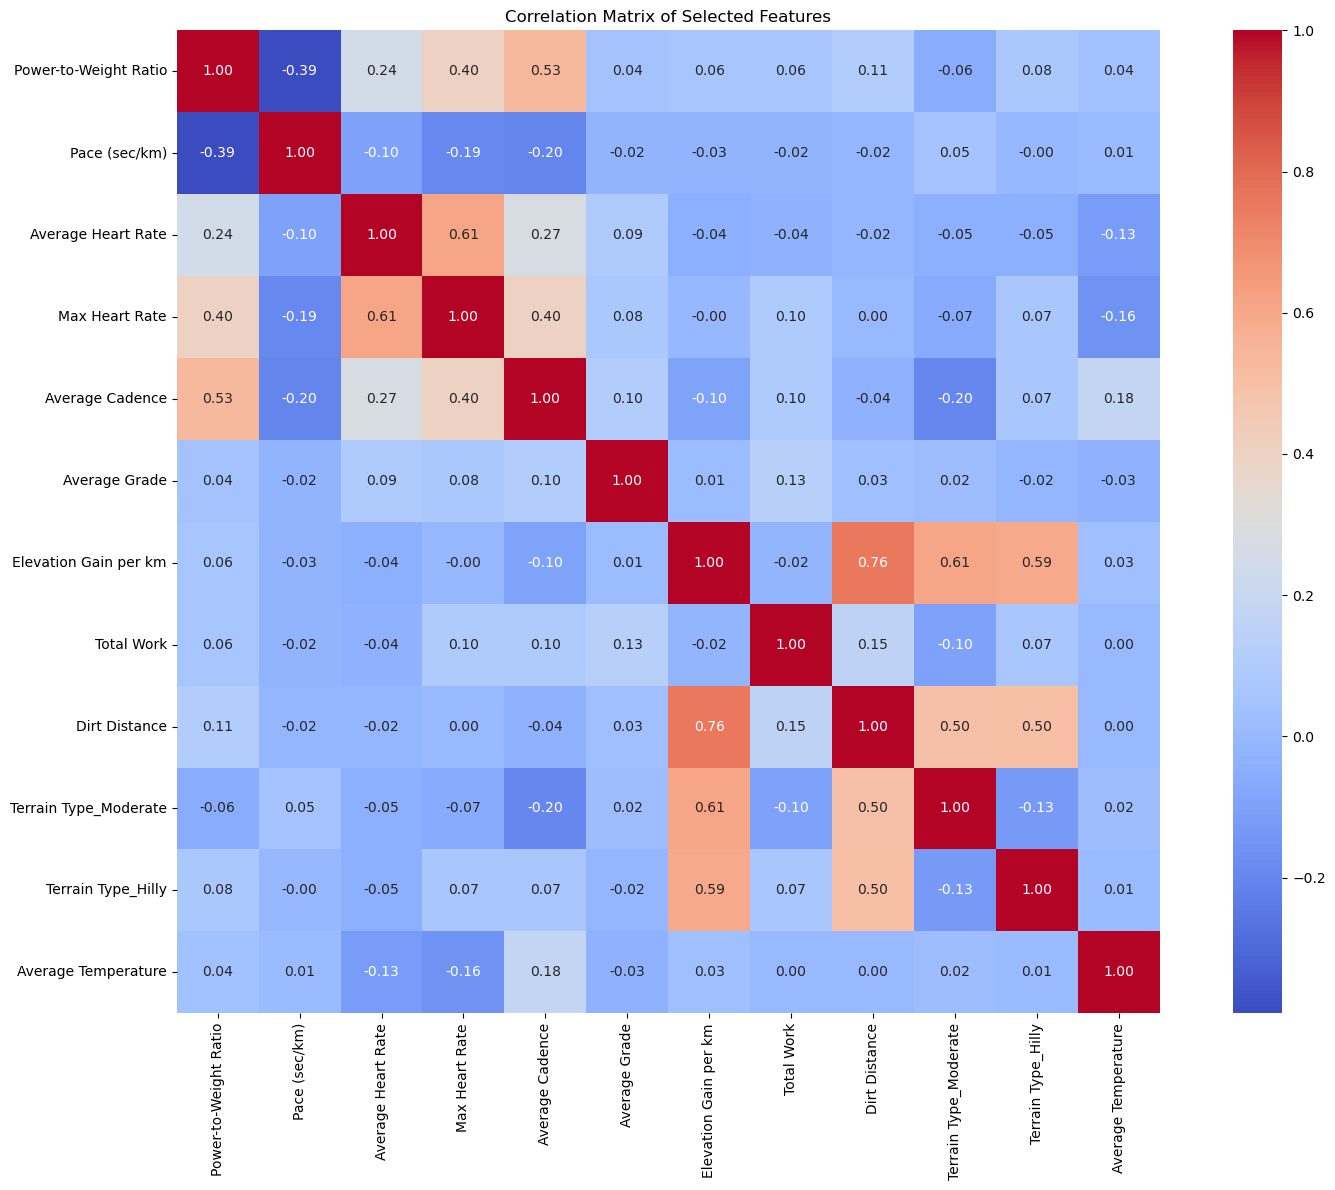

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()


The heatmap no longer shows strong red blocks, indicating reduced feature redundancy.

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Standardize features
X_scaled = StandardScaler().fit_transform(df[selected_features])
X_df = pd.DataFrame(X_scaled, columns=selected_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


                  Feature       VIF
6   Elevation Gain per km  6.864178
9   Terrain Type_Moderate  4.564177
10     Terrain Type_Hilly  4.425347
8           Dirt Distance  2.777604
3          Max Heart Rate  2.009820
0   Power-to-Weight Ratio  1.708199
2      Average Heart Rate  1.695524
4         Average Cadence  1.685578
1           Pace (sec/km)  1.205521
7              Total Work  1.142577
11    Average Temperature  1.120474
5           Average Grade  1.038260


All VIF scores are now **below 10**, confirming low multicollinearity across features

## 6. Model Training and Evaluation

### 6.1 Model Selection Justification

To determine the most suitable model, we first visualized each feature's relationship with VO₂ Max. The scatter plots showed a mixture of linear and non-linear patterns:

- Linear trends: Power-to-Weight Ratio, Max Heart Rate
- Non-linear or scattered: Pace (sec/km), Elevation Gain per km, Terrain Type and others

This indicates that models capable of handling both linear and non-linear relationships are more appropriate.

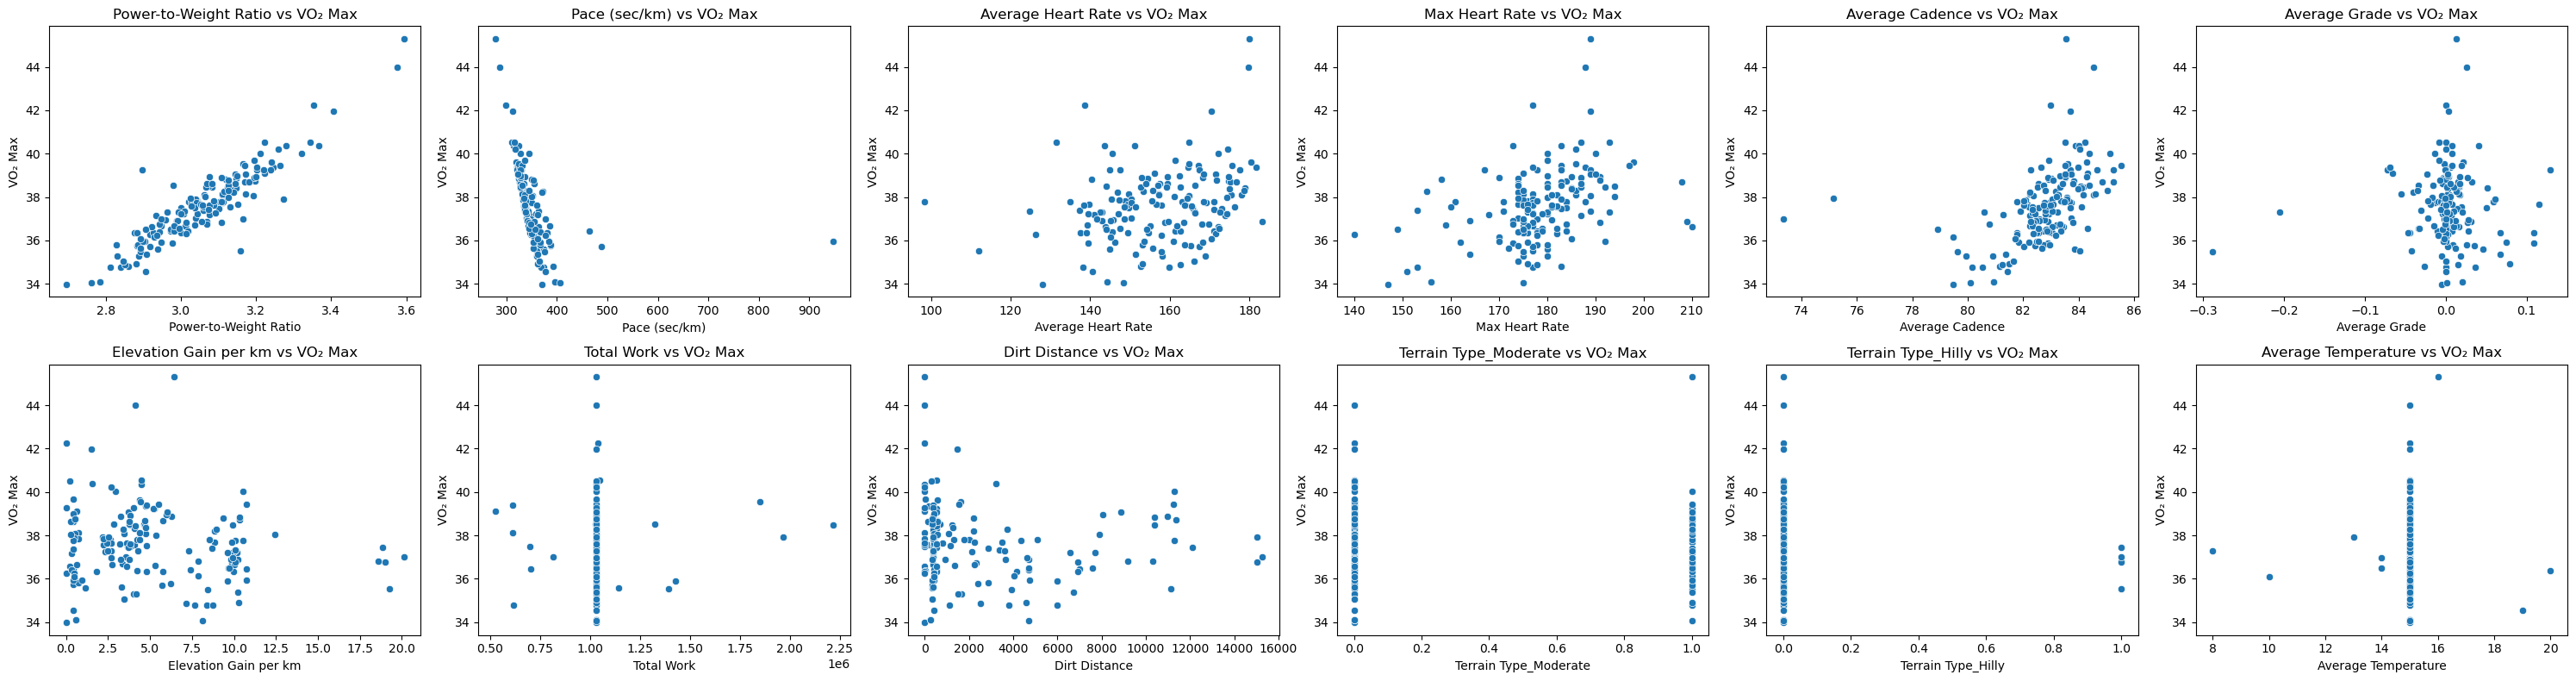

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Feature list
features = X.columns.tolist()
num_features = len(features)

# Define grid size: 2 rows, calculate needed columns
rows = 2
cols = math.ceil(num_features / rows)

# Set figure size
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()  # flatten to easily index

# Plot each feature against VO₂ Max
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['VO2 Max'], ax=axes[i])
    axes[i].set_title(f'{feature} vs VO₂ Max')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('VO₂ Max')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 6.2 Model Comparison

To evaluate this, six different models using an 80/20 train-test split are trained:
- Linear Regression
- Support Vector Regression (SVR)
- Random Forest
- Gradient Boosting
- K-Nearest Neighbors
- Decision Tree

Metrics used:
- R² Score (accuracy)
- RMSE (error magnitude)

### Results Summary:


Lets check the result if model include average speed as a feature

In [169]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

features = [
     "Power-to-Weight Ratio",
    "Pace (sec/km)",
    "Average Heart Rate",
    "Max Heart Rate",
    "Average Cadence",
    "Average Grade",
   "Elevation Gain per km",
    "Total Work",
    "Dirt Distance",
    "Terrain Type_Moderate",
    "Terrain Type_Hilly",
    "Average Temperature",
    'Average Speed'

]    
    
X = df[features]
y = df['VO2 Max']

X = X.astype(float)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1), #mixed linear/non-linear data
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train models and store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append({'Model': name, 'R² Score': r2, 'RMSE': rmse})

# Create results dataframe
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
results_df


,Model,R² Score,RMSE
3,Linear Regression,1.000000,5.801557e-15
1,Gradient Boosting,0.988602,2.108721e-01
5,Decision Tree,0.981716,2.670810e-01
0,Random Forest,0.979219,2.847365e-01
2,SVR,0.953249,4.270778e-01
4,K-Nearest Neighbors,0.835340,8.015037e-01


This result looks too perfect, especially for Linear Regression (R² = 1.0, RMSE ≈ 0), which strongly suggests data leakage or label leakage that support my above statement. This happens when features contain information directly related to the target, allowing the model to "memorize" rather than learn patterns, leading to overfitting and poor generalization on unseen data.

Now, train the model without average speed.

In [172]:
features = [
     "Power-to-Weight Ratio",
    "Pace (sec/km)",
    "Average Heart Rate",
    "Max Heart Rate",
    "Average Cadence",
    "Average Grade",
    "Elevation Gain per km",
    "Total Work",
    "Dirt Distance",
    "Terrain Type_Moderate",
    "Terrain Type_Hilly",  
    "Average Temperature",
]    
    
X = df[features]
y = df['VO2 Max']

X = X.astype(float)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1), #mixed linear/non-linear data
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train models and store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append({'Model': name, 'R² Score': r2, 'RMSE': rmse})

# Create results dataframe
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
results_df


,Model,R² Score,RMSE
3,Linear Regression,0.939048,0.487648
0,Random Forest,0.922337,0.550452
2,SVR,0.893509,0.644569
1,Gradient Boosting,0.891455,0.650752
5,Decision Tree,0.834563,0.803393
4,K-Nearest Neighbors,0.774604,0.937746


Among all tested models, Linear Regression achieved the highest R² score, indicating the most accurate VO₂ Max predictions.



### 6.3 Apply Cross Validation to stimulate multiple train-test scenarios

In [173]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create results storage
cv_results = []

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=5)
    rmse_scores = -cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv=5)

    cv_results.append({
        'Model': name,
        'CV R² Mean': scores.mean(),
        'CV R² Std': scores.std(),
        'CV RMSE Mean': rmse_scores.mean(),
        'CV RMSE Std': rmse_scores.std()
    })

cv_results_df = pd.DataFrame(cv_results).sort_values(by='CV R² Mean', ascending=False)
cv_results_df


,Model,CV R² Mean,CV R² Std,CV RMSE Mean,CV RMSE Std
1,Gradient Boosting,0.834404,0.106906,0.606189,0.161291
0,Random Forest,0.827898,0.099204,0.629398,0.157339
2,SVR,0.751569,0.105407,0.771746,0.154524
5,Decision Tree,0.704009,0.167070,0.806985,0.119584
4,K-Nearest Neighbors,0.642859,0.136933,0.927525,0.175324
3,Linear Regression,0.616215,0.287121,0.956390,0.513548


### Model Performance Before vs After Cross Validation

The initial model evaluation was based on a single train-test split. While this provided a quick estimation of model performance, it may not fully reflect the model's ability to generalize to unseen data.

After applying 5-fold Cross Validation, the R² scores of all models decreased. This is expected because cross-validation provides a more robust and realistic evaluation by testing the model on multiple subsets of data.

Models like Random Forest and Gradient Boosting showed stable performance with only a slight drop in R², demonstrating good generalization ability. However, models like SVR, K-Nearest Neighbors, and Linear Regression experienced a larger performance drop, indicating that their previous results were likely influenced by overfitting on the initial train-test split. 

These observations are consistent with earlier scatterplot analysis, which showed a mixture of linear and non-linear relationships between features and VO₂ Max. This supports the selection of tree-based models, which naturally capture both types of relationships. In conclusion, cross-validation confirms that Gradient Boosting and Random Forest are the most reliable and generalizable models for predicting VO₂ Max in this dataset.


## 7. Feature Importance

We extracted and visualized feature coefficients from the best-performing model.

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100}


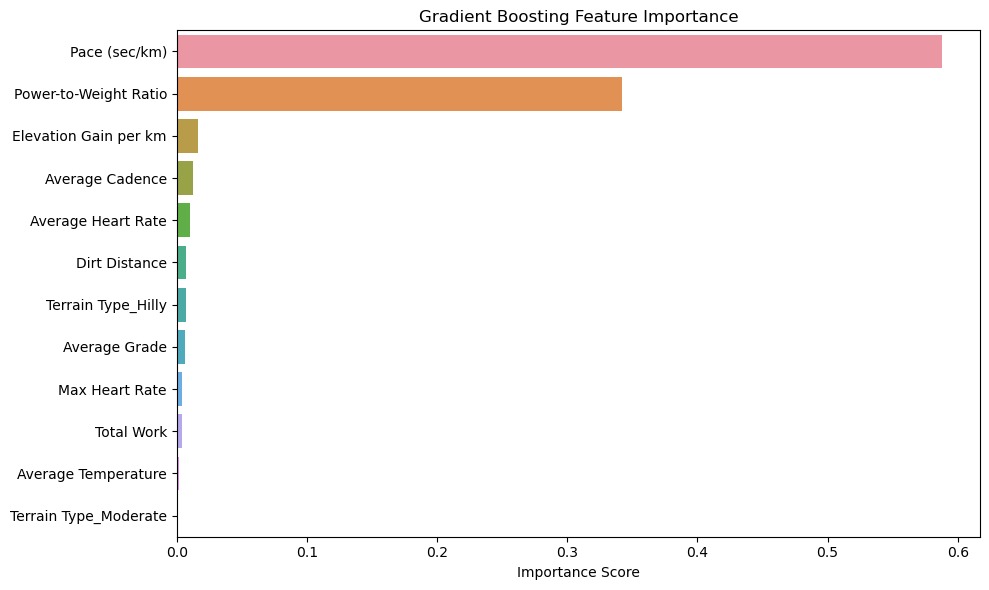

Final Test R²: 0.9026982426334418
Final Test RMSE: 0.6161297300615692


['best_gb_params.pkl']

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

#GridSearchCV for Gradient Boosting
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1]
}

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

grid_search = GridSearchCV(gb_pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

#Feature Importance Plot
best_model = grid_search.best_estimator_.named_steps['regressor']
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#Evaluate Final Model on Test Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("Final Test R²:", r2_score(y_test, y_pred))
print("Final Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Step 4: Save Model
joblib.dump(final_model, 'final_vo2max_model.pkl')
joblib.dump(grid_search.best_params_, 'best_gb_params.pkl')


### Final Model Performance Summary

After applying cross-validation and hyperparameter tuning, the Gradient Boosting model achieved a final test R² score of 0.9014 and an RMSE of 0.6202.

This indicates that the model is able to explain approximately 90% of the variance in VO₂ Max, which is considered excellent performance for real-world sports data. 

Since VO₂ Max is influenced by various external factors (e.g., nutrition, sleep, stress, recovery) that are not captured in this dataset, achieving this level of predictive accuracy demonstrates that the selected features are highly relevant and effective for modeling VO₂ Max.

The feature importance plot shows that `Pace (sec/km)` and `Power-to-Weight Ratio` are the two most influential features in predicting VO₂ Max. 

This aligns well with domain knowledge in sports science, where faster pace and higher power-to-weight ratio typically reflect better aerobic fitness and cardiovascular capacity.

Other contributing features include:
- Elevation Gain per km
- Average Grade
- Heart Rate metrics (Average & Max)
- Average Cadence
- Contextual features like Dirt Distance and Terrain Type

Environmental features such as `Terrain Type` and `Average Temperature` contributed relatively less to the model performance but were retained to provide additional context to the prediction.


## 8. Conclusion

This project developed a robust and interpretable model to predict VO₂ Max from running activity data using wearable-derived metrics. By engineering features like **power-to-weight ratio**, **terrain classification**, and **elevation gain per km**, and removing speed-based leakage and multicollinearity, the model achieved high predictive performance.

After tuning and validation, Gradient Boosting emerged as the most reliable model, achieving R² = 0.901 and RMSE = 0.62, effectively capturing both linear and non-linear relationships.

Importantly, this approach demonstrated that VO₂ Max can be predicted accurately without relying on speed, instead using meaningful physiological and performance indicators. This decision was made because VO₂ Max values from wearable devices are often derived using formulas that directly incorporate speed or pace. Including speed in the model would risk data leakage, artificially inflating model performance without providing real predictive insight.

Future improvements could incorporate contextual data such as sleep and recovery to further enhance robustness. This methodology supports applications in athlete monitoring, sports analytics, and personalized training insights.